# Dependencies

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# De-serializing data

In [2]:
pin = pickle.load(open('serialized files/pin.pkl', 'rb'))
pin

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
923,678,5.0,100,1,102,0.0,741.0,Airtel,Voucher Pin,Universal Pin
993,1042,5.0,801,9,106,0.0,501.0,MTN,Voucher Pin,Universal Pin
1027,1042,5.0,200,2,107,0.0,501.0,Glo,Voucher Pin,Universal Pin
1193,2253,5.0,100,1,114,0.0,447.0,9mobile,Voucher Pin,Universal Pin
1194,2253,5.0,100,1,114,0.0,447.0,Airtel,Voucher Pin,Universal Pin
2493,852,5.0,500,5,105,0.0,0.0,MTN,Voucher Pin,Universal Pin
2620,1642,5.0,861800,8996,30,0.0,1642.0,Airtel,Voucher Pin,Universal Pin
2621,1642,5.0,192150,2074,30,0.0,1642.0,9mobile,Voucher Pin,Universal Pin
2622,1642,5.0,1999950,21174,30,0.0,1642.0,MTN,Voucher Pin,Universal Pin
2624,1642,5.0,193550,2021,91,0.0,1642.0,Glo,Voucher Pin,Universal Pin


# Preprocessing

In [3]:
pin = pin[['user_id', 'TotalTransactionAmount', 'Tx_Count', 'DaysSinceLastTrans']]
pin

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
923,678,100,1,102
993,1042,801,9,106
1027,1042,200,2,107
1193,2253,100,1,114
1194,2253,100,1,114
2493,852,500,5,105
2620,1642,861800,8996,30
2621,1642,192150,2074,30
2622,1642,1999950,21174,30
2624,1642,193550,2021,91


In [4]:
pin.describe()

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
count,14.000000,1.400000e+01,14.000000,14.000000
mean,1518.285714,2.399822e+05,2533.500000,91.500000
std,464.572993,5.562400e+05,5877.708119,34.157441
min,678.000000,1.000000e+02,1.000000,30.000000
25%,1192.000000,2.375000e+02,2.500000,93.500000
50%,1642.000000,7.755000e+02,11.000000,105.500000
75%,1642.000000,1.710750e+05,1803.500000,113.750000
max,2253.000000,1.999950e+06,21174.000000,119.000000


In [5]:
pin_customers = pin.groupby(['user_id']).agg({
    'TotalTransactionAmount': 'sum',
    'Tx_Count': 'count',
    'DaysSinceLastTrans' : 'sum'
})

pin_customers.rename(columns={'TotalTransactionAmount': 'Amount',
                                 'Tx_Count': 'Freq',
                                'DaysSinceLastTrans': 'Re'}, inplace=True)
pin_customers

,Amount,Freq,Re
user_id,,,
678,100,1,102
852,500,1,105
1042,1001,2,213
1642,3357950,8,633
2253,200,2,228


In [6]:
print(pin_customers.Re.skew())
print(pin_customers.Freq.skew())
print(pin_customers.Amount.skew())

1.8436953996420817
2.0770565944246666
2.2360676730928484


## Converting Data to Gaussian Distribution

### Visualization

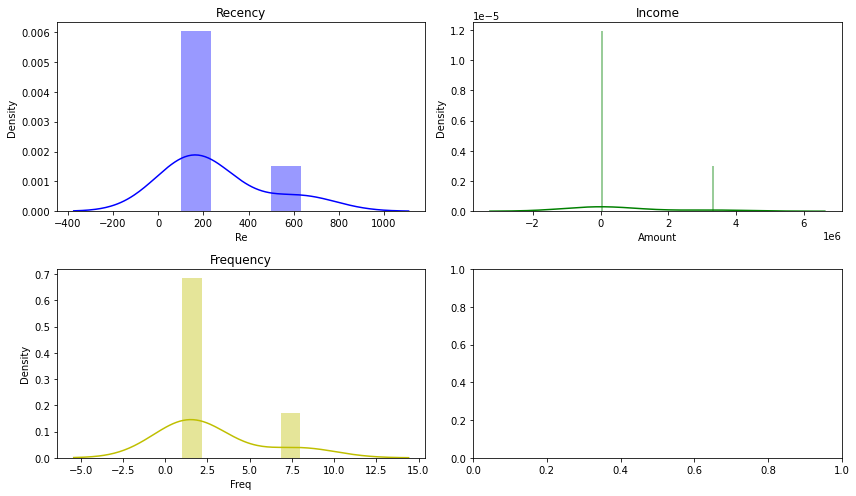

In [7]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(pin_customers.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(pin_customers.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(pin_customers.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Log Transformation

In [8]:
log_trans = pd.DataFrame()
log_trans['Amount'] = np.log(pin_customers['Amount'])
log_trans['Freq'] = np.log(pin_customers['Freq'])
log_trans['Re'] = np.log(pin_customers['Re'])

print(log_trans.Re.skew())
print(log_trans.Freq.skew())
print(log_trans.Amount.skew())

0.930263067318704
1.360827634879543
2.000503802891486


#### After-Log-Transformation

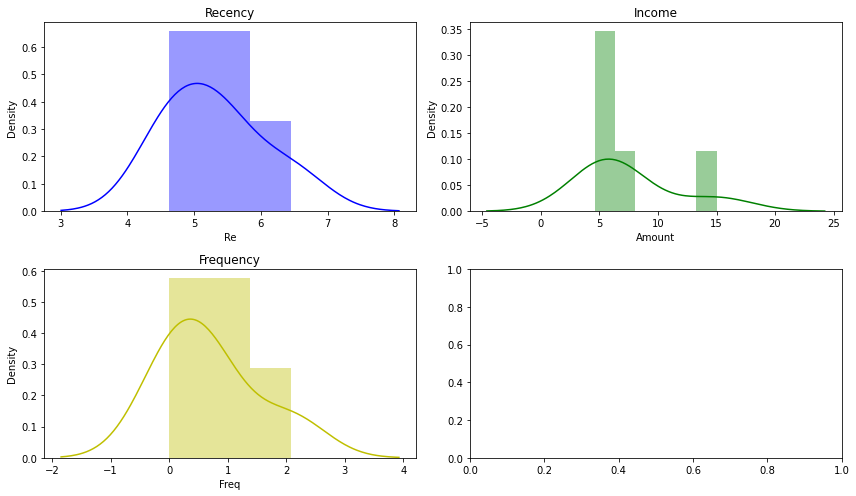

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(log_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(log_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(log_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### BoxCox Transfromation

In [25]:
boxcox_trans = pd.DataFrame()
boxcox_trans['Amount'] = stats.boxcox(pin_customers['Amount'])[0]
boxcox_trans['Freq'] = stats.boxcox(pin_customers['Freq'])[0]
boxcox_trans['Re'] = stats.boxcox(pin_customers['Re'])[0]

print(boxcox_trans.Re.skew())
print(boxcox_trans.Freq.skew())
print(boxcox_trans.Amount.skew())

0.2716277366720195
0.4080387045404123
0.8607388033547918


#### After-Boxcox-Transformation

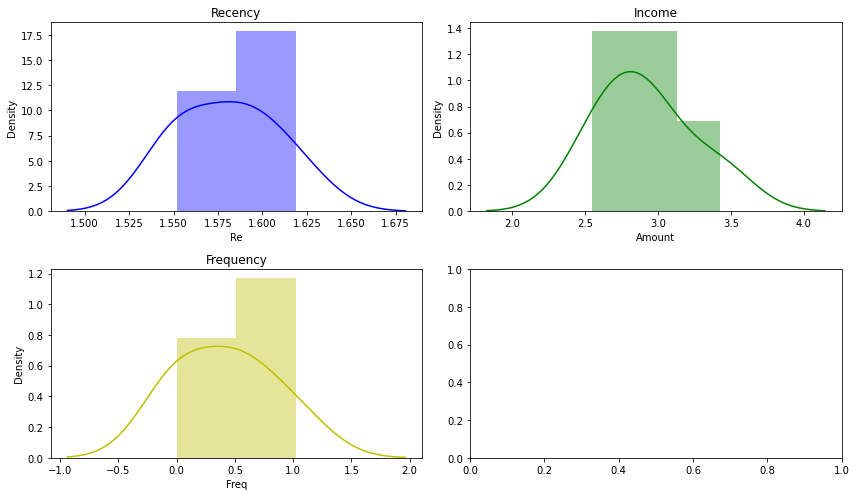

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(boxcox_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(boxcox_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(boxcox_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Cubic Root Transformation

In [12]:
square_trans = pd.DataFrame()
square_trans['Amount'] = np.cbrt(pin_customers['Amount'])
square_trans['Freq'] = np.cbrt(pin_customers['Freq'])
square_trans['Re'] = np.cbrt(pin_customers['Re'])

print(square_trans.Re.skew())
print(square_trans.Freq.skew())
print(square_trans.Amount.skew())

1.296844319778245
1.6951648811372222
2.2303390000469405


#### After-Cubic-Root-Transformation

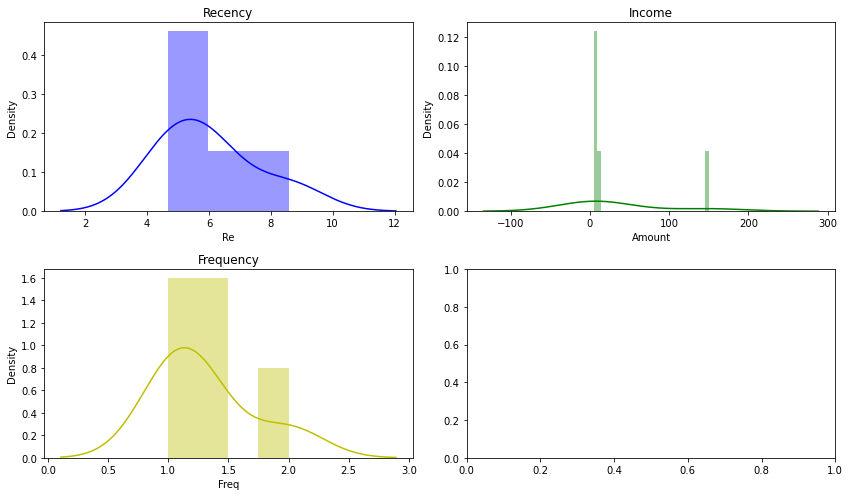

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(square_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(square_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(square_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

<b>BOX COX Transfroms the Data Better</b>

### Normalization

In [27]:
scale = StandardScaler()
scale.fit(boxcox_trans)
pin_normalized = scale.transform(boxcox_trans)

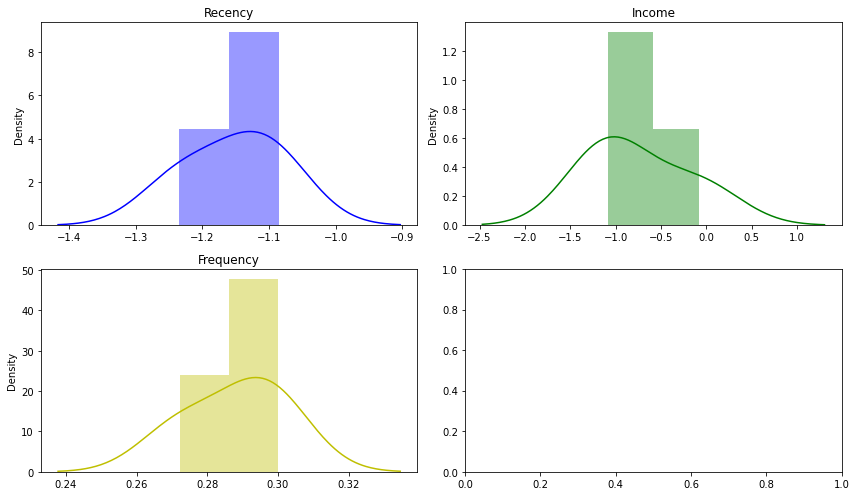

[ 0.  0. -0.]
[1. 1. 1.]


In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(pin_normalized[0], color='b', ax=ax[0, 0])
fig = sns.distplot(pin_normalized[1], color='g', ax=ax[0, 1])
fig = sns.distplot(pin_normalized[2], color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

print(pin_normalized.mean(axis = 0).round(2))
print(pin_normalized.std(axis = 0).round(2))

# Clustering

## Hyperparameter Tuning using the Elbow Method

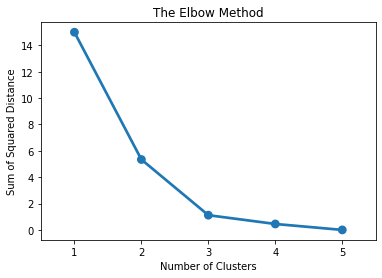

In [33]:
sse = {}

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pin_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [34]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(pin_normalized)
model.labels_

array([1, 1, 2, 0, 2])

## Matching labels with each customer

In [35]:
pin_customers["Cluster"] = model.labels_
pin_customers.groupby('Cluster').agg({
    'Re':'mean',
    'Freq':'mean',
    'Amount':['mean', 'count']}).round(2)
pin_customers

,Amount,Freq,Re,Cluster
user_id,,,,
678,100,1,102,1
852,500,1,105,1
1042,1001,2,213,2
1642,3357950,8,633,0
2253,200,2,228,2


## Melting the Dataframe

In [36]:
df_normalized = pd.DataFrame(pin_normalized, columns=['Re', 'Freq', 'Amount'])
df_normalized['Cust ID'] = pin_customers.index
df_normalized['Cluster'] = model.labels_

df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['Cust ID', 'Cluster'],
                      value_vars=['Re','Freq','Amount'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt

,Cust ID,Cluster,Attribute,Value
0,678,1,Re,-1.234351
1,852,1,Re,-0.081764
2,1042,2,Re,0.272249
3,1642,0,Re,1.715823
4,2253,2,Re,-0.671957
5,678,1,Freq,-1.085115
6,852,1,Freq,-1.085115
7,1042,2,Freq,0.300112
8,1642,0,Freq,1.570005
9,2253,2,Freq,0.300112


### Visualization

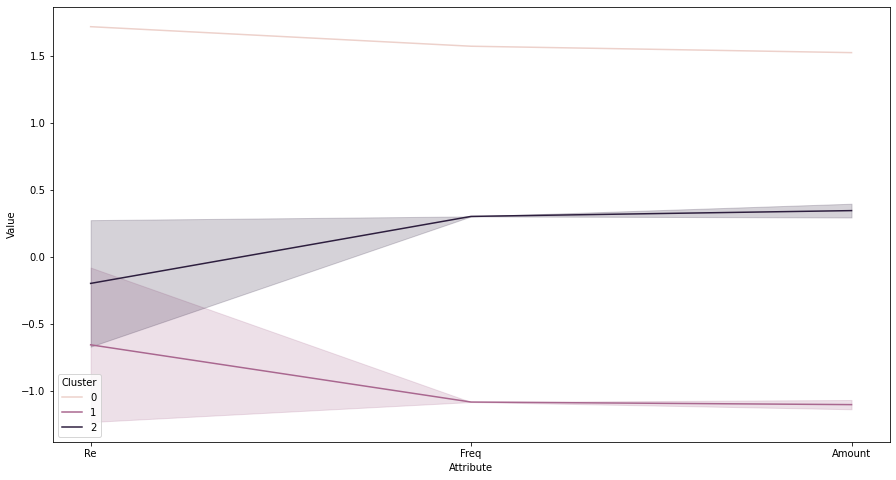

In [37]:
plt.figure(figsize=(15, 8))
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()